In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [15]:
a1 = 0.5  # прирост жертвы
b1 = 0.4  # коэффициент поедания
a2 = 0.3  # вымирание хищника
k = 0.8  # КПД биомассы
x0 = 1.0  # начальная популяция жертвы
y0 = 1.0  # начальная популяция хищника
t_end = 200.0  # конечное время
N = 1000  # количество шагов 
t = np.linspace(0, t_end, N + 1)  # время
dt = t[1] - t[0]  # шаг 

def f(state, time_unused):
    x, y = state
    fx = a1 * x - b1 * x * y  # dx/dt
    fy = -a2 * y + k * x * y  # dy/dt
    return [fx, fy]

# метод Эйлера
def euler_method(f, state0, t):
    n = len(t)
    states = np.zeros((n, 2))
    states[0] = state0
    for j in range(1, n):
        states[j] = states[j-1] + dt * np.array(f(states[j-1], t[j-1]))
    return states

states_euler = euler_method(f, [x0, y0], t)
x_euler = states_euler[:, 0]
y_euler = states_euler[:, 1]

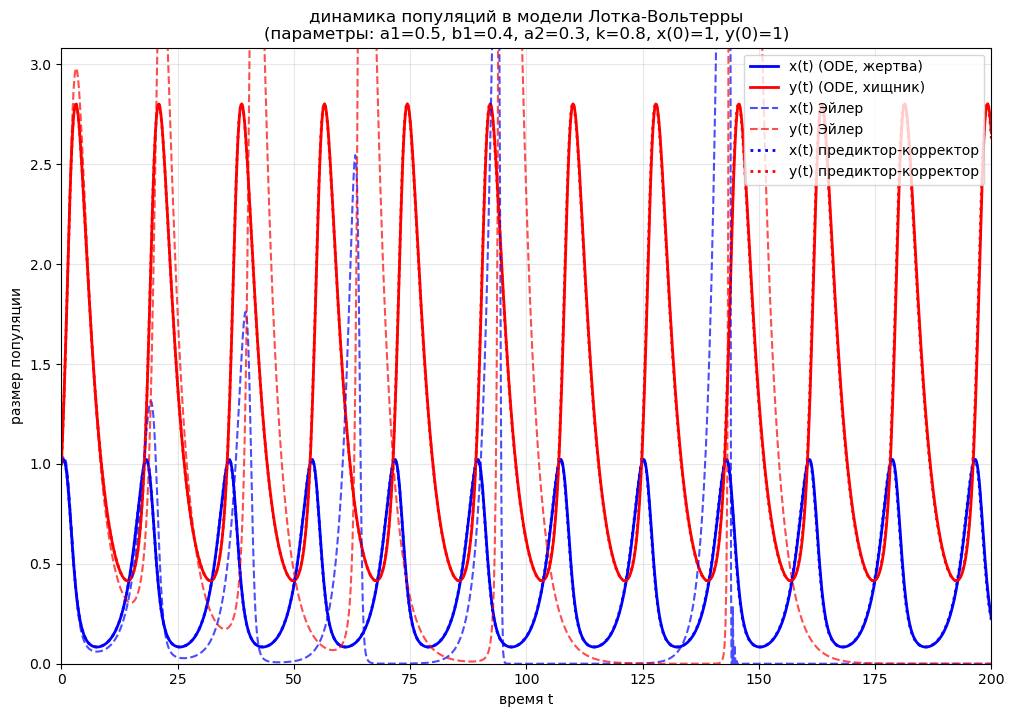

начальные значения: x(0) = 1.00, y(0) = 1.00
значения в t=200: x(200) ≈ 0.23, y(200) ≈ 2.66 (ODE)


In [17]:
# метод предиктор-корректор
def predictor_corrector(f, state0, t):
    n = len(t)
    states = np.zeros((n, 2))
    states[0] = state0
    for j in range(1, n):
        state_pred = states[j-1] + dt * np.array(f(states[j-1], t[j-1])) # предиктор: y* = y_j + dt * f(y_j)
        states[j] = states[j-1] + (dt / 2) * (np.array(f(states[j-1], t[j-1])) + np.array(f(state_pred, t[j]))) # корректор y_{j+1} = y_j + (dt/2) * (f(y_j) + f(y*))
    return states

states_pc = predictor_corrector(f, [x0, y0], t)
x_pc = states_pc[:, 0]
y_pc = states_pc[:, 1]

# точное решение с odeint (Рунге-Кутт 4 пор.)
def lotka_volterra(state, t, a1, b1, a2, k):
    x, y = state
    dxdt = a1 * x - b1 * x * y
    dydt = -a2 * y + k * x * y
    return [dxdt, dydt]

states_ode = odeint(lotka_volterra, [x0, y0], t, args=(a1, b1, a2, k))
x_ode = states_ode[:, 0]
y_ode = states_ode[:, 1]

plt.figure(figsize=(12, 8))
plt.plot(t, x_ode, 'b-', linewidth=2, label='x(t) (ODE, жертва)')
plt.plot(t, y_ode, 'r-', linewidth=2, label='y(t) (ODE, хищник)')
plt.plot(t, x_euler, 'b--', alpha=0.7, label='x(t) Эйлер')
plt.plot(t, y_euler, 'r--', alpha=0.7, label='y(t) Эйлер')
plt.plot(t, x_pc, 'b:', linewidth=2, label='x(t) предиктор-корректор')
plt.plot(t, y_pc, 'r:', linewidth=2, label='y(t) предиктор-корректор')
plt.xlabel('время t')
plt.ylabel('размер популяции')
plt.title('динамика популяций в модели Лотка-Вольтерры\n(параметры: a1=0.5, b1=0.4, a2=0.3, k=0.8, x(0)=1, y(0)=1)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 200)
plt.ylim(0, max(max(x_ode), max(y_ode)) * 1.1)
plt.show()

print("начальные значения: x(0) = {:.2f}, y(0) = {:.2f}".format(x_ode[0], y_ode[0]))
print("значения в t=200: x(200) ≈ {:.2f}, y(200) ≈ {:.2f} (ODE)".format(x_ode[-1], y_ode[-1]))

In [19]:
# Жертвы растут при низкой численности хищников, затем хищники увеличиваются,
# снижая популяцию жертв, и цикл повторяется. 
# Метод Эйлера (пунктир) может накапливать ошибку, предиктор-корректор (точечная линия) ближе к точному решению.

In [ ]:
#хищники вымирают медленнее, а КПД преобразования биомассы выше,что влияет на амплитуду и частоту осцилляций